# NanoAODplus_analyzer

In [5]:
import time

from coffea import hist
from coffea.analysis_objects import JaggedCandidateArray
import coffea.processor as processor
from awkward import JaggedArray
import numpy as np
from pprint import pprint

from nanoAODplus_processor.AnalyzerProcessor import AnalyzerProcessor
from data.fileset import filesets

import matplotlib.pyplot as plt
import mplhep as hep
plt.style.use(hep.style.CMS)

In [2]:
tstart = time.time()

files = {'Charmonium2017MINIAOD': filesets['Charmonium2017MINIAOD'][0:10], 
           'MuOnia2017MINIAOD': filesets['MuOnia2017MINIAOD'][0:10], 
           'DoubleMuon2017AOD': filesets['DoubleMuon2017AOD'][0:30]
          }

output = processor.run_uproot_job(files,
                                  treename='Events',
                                  processor_instance=AnalyzerProcessor(),
                                  #executor=processor.iterative_executor,
                                  #executor_args={'flatten': True},
                                  executor=processor.futures_executor,
                                  #executor_args={'workers': 6, 'flatten': True},
                                  executor_args={'workers': 8, 'flatten': True},
                                  chunksize=10000,
                                 )

elapsed = time.time() - tstart
print(output)


{'muon_pt': <Hist (dataset,pt) instance at 0x7f47ec2300b8>, 'muon_eta': <Hist (dataset,eta) instance at 0x7f47e1031ba8>, 'muon_phi': <Hist (dataset,phi) instance at 0x7f47e1031c50>, 'dimu_mass': <Hist (dataset,mass) instance at 0x7f47e1049e80>, 'dimu_pt': <Hist (dataset,pt) instance at 0x7f47e1049ac8>, 'dimu_eta': <Hist (dataset,eta) instance at 0x7f47e1049a90>, 'dimu_phi': <Hist (dataset,phi) instance at 0x7f47e1049be0>, 'cutflow': defaultdict(<class 'int'>, {'all events': 1725316, 'all muons': 8784770, 'soft muon': 6088110, 'global muon': 3594600, 'pt cut': 3316118, 'eta cut': 3311285, 'iso muon': 934374, 'valid vtx': 934327, 'two muons': 242148, 'opposite charge': 233514, 'same vtx': 223493})}


/afs/cern.ch/user/k/kmotaama/miniconda3/envs/OniaOpenCharmRun2ULenv/lib/python3.6/site-packages/mplhep/_deprecate.py:56: DeprecationWarning: kwarg "densitymode" in function "histplot" is deprecated and may be removed in future versions: "unit"mode is not useful
  return func(*args, **kwargs)
findfont: Font family ['cursive'] not found. Falling back to DejaVu Sans.


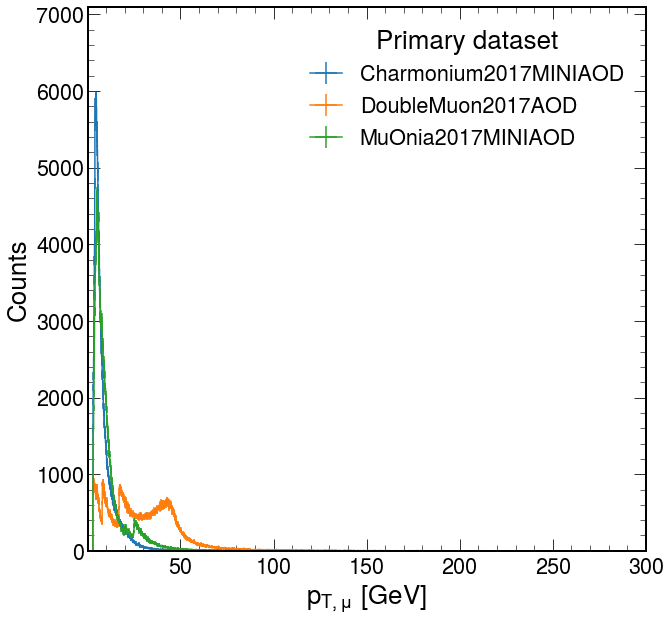

In [3]:
ax = hist.plot1d(output['muon_pt'], overlay='dataset')

/afs/cern.ch/user/k/kmotaama/miniconda3/envs/OniaOpenCharmRun2ULenv/lib/python3.6/site-packages/mplhep/_deprecate.py:56: DeprecationWarning: kwarg "densitymode" in function "histplot" is deprecated and may be removed in future versions: "unit"mode is not useful
  return func(*args, **kwargs)


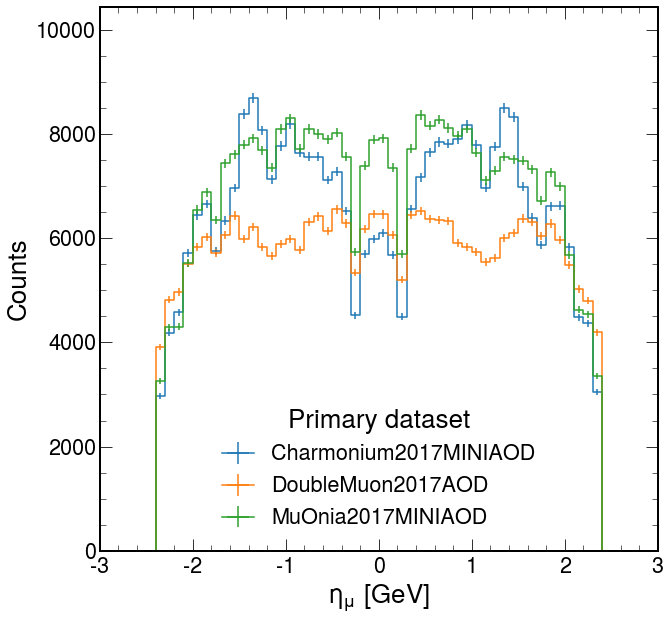

In [4]:
ax = hist.plot1d(output['muon_eta'], overlay='dataset')

/afs/cern.ch/user/k/kmotaama/miniconda3/envs/OniaOpenCharmRun2ULenv/lib/python3.6/site-packages/mplhep/_deprecate.py:56: DeprecationWarning: kwarg "densitymode" in function "histplot" is deprecated and may be removed in future versions: "unit"mode is not useful
  return func(*args, **kwargs)


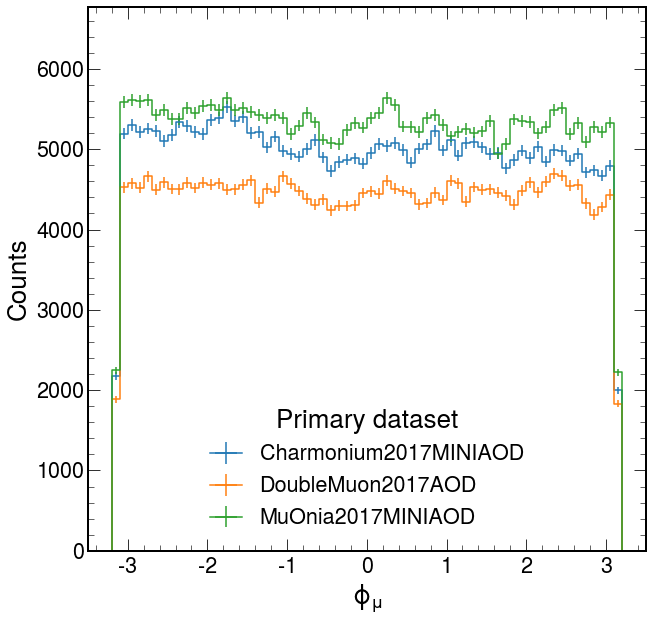

In [5]:
ax = hist.plot1d(output['muon_phi'], overlay='dataset')

/afs/cern.ch/user/k/kmotaama/miniconda3/envs/OniaOpenCharmRun2ULenv/lib/python3.6/site-packages/mplhep/_deprecate.py:56: DeprecationWarning: kwarg "densitymode" in function "histplot" is deprecated and may be removed in future versions: "unit"mode is not useful
  return func(*args, **kwargs)


(2.5, 100.0)

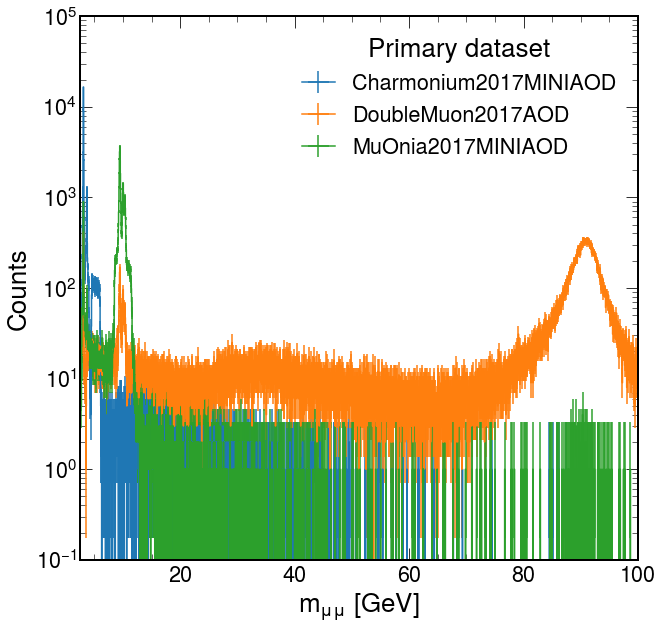

In [6]:
ax = hist.plot1d(output['dimu_mass'], overlay='dataset')
ax.set_yscale('log')
ax.set_ylim(0.1,1e5)
ax.set_xlim(2.5,100)

/afs/cern.ch/user/k/kmotaama/miniconda3/envs/OniaOpenCharmRun2ULenv/lib/python3.6/site-packages/mplhep/_deprecate.py:56: DeprecationWarning: kwarg "densitymode" in function "histplot" is deprecated and may be removed in future versions: "unit"mode is not useful
  return func(*args, **kwargs)


(0.0, 300.0)

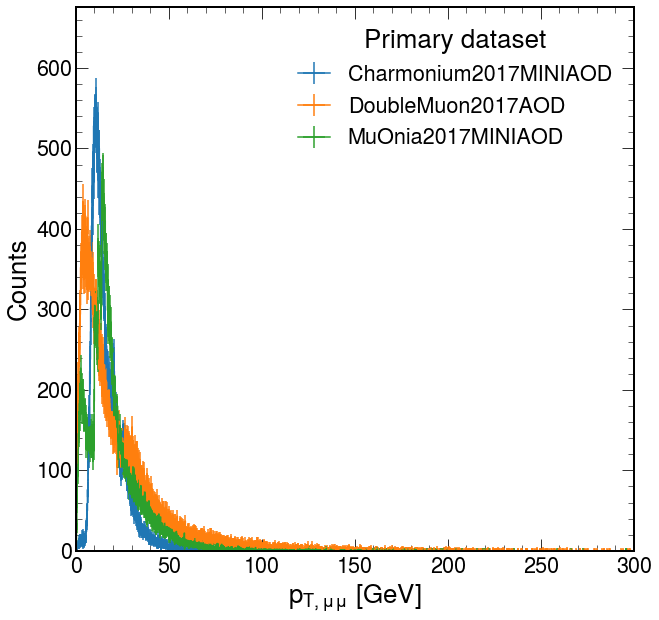

In [7]:
ax = hist.plot1d(output['dimu_pt'], overlay='dataset')
ax.set_xlim(0,300)

/afs/cern.ch/user/k/kmotaama/miniconda3/envs/OniaOpenCharmRun2ULenv/lib/python3.6/site-packages/mplhep/_deprecate.py:56: DeprecationWarning: kwarg "densitymode" in function "histplot" is deprecated and may be removed in future versions: "unit"mode is not useful
  return func(*args, **kwargs)


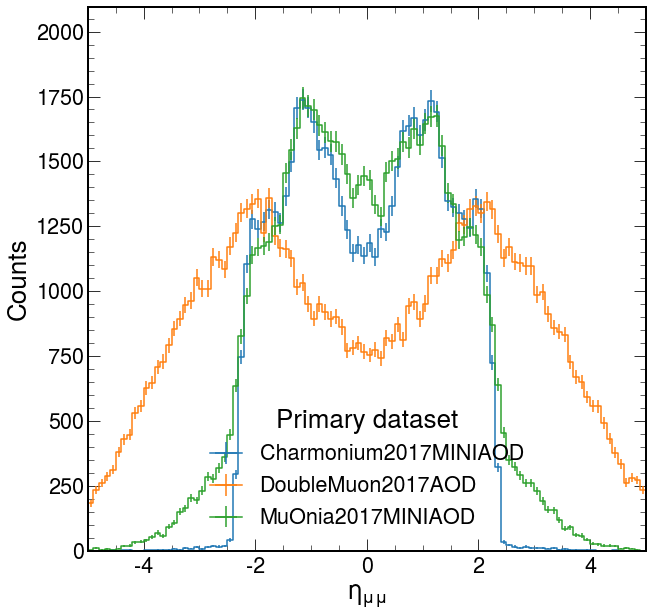

In [8]:
ax= hist.plot1d(output['dimu_eta'], overlay='dataset')

/afs/cern.ch/user/k/kmotaama/miniconda3/envs/OniaOpenCharmRun2ULenv/lib/python3.6/site-packages/mplhep/_deprecate.py:56: DeprecationWarning: kwarg "densitymode" in function "histplot" is deprecated and may be removed in future versions: "unit"mode is not useful
  return func(*args, **kwargs)


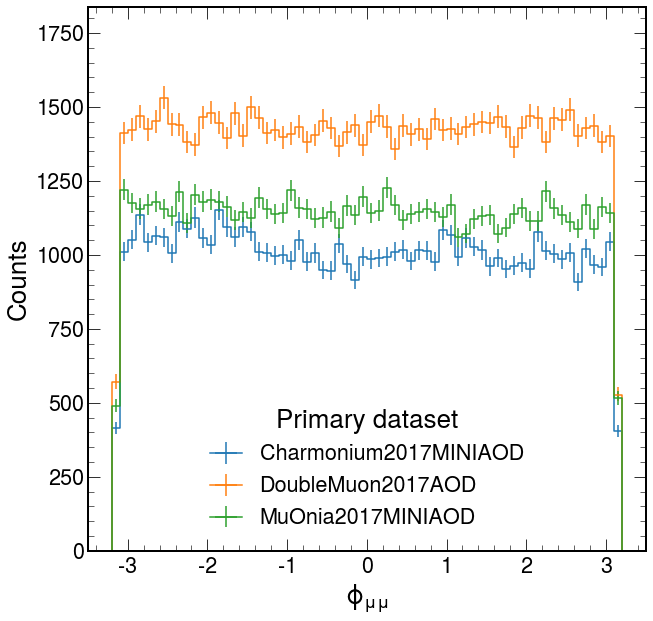

In [9]:
ax= hist.plot1d(output['dimu_phi'], overlay='dataset')

In [10]:
print("Events/s:", output['cutflow']['all events']/elapsed, "Time elapsed:", elapsed)
print(output['cutflow'])

Events/s: 8953.92900694097 Time elapsed: 192.68814826011658
defaultdict(<class 'int'>, {'all events': 1725316, 'all muons': 8784770, 'soft muon': 6088110, 'global muon': 3594600, 'pt cut': 3316118, 'eta cut': 3311285, 'iso muon': 934374, 'valid vtx': 934327, 'two muons': 242148, 'opposite charge': 233514, 'same vtx': 223493})
